# Clase 3 - Clasificación y manipulación de atributos
En esta clase vamos a aplicar métodos bayesianos y árboles de decisión.

Primero revisamos que todas las librerías estén instaladas.  

In [2]:
%pylab inline
import IPython
import sklearn as sk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pydotplus

import sys
print('Python version:', sys.version)

print('IPython version:', IPython.__version__)
print('numpy version:', np.__version__)
print('scikit-learn version:', sk.__version__)
print('matplotlib version:', matplotlib.__version__)


RANDOM_STATE=14

Populating the interactive namespace from numpy and matplotlib
Python version: 3.5.2 |Anaconda 4.2.0 (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython version: 5.1.0
numpy version: 1.13.1
scikit-learn version: 0.19.0
matplotlib version: 2.0.2


## Importación y procesamiento de datos
En todo proyecto de aprendizaje automático es fundamental manejar el conjunto de datos.
Es importante tener una noción del conjunto de datos, para saber, entre otras cosas:
* Qué atributos son numéricos, y cuáles son categóricos.
* Si hace falta normalizar los atributos (depende del algoritmo a utilizar también)
* La presencia de atributos faltantes.

### Importación
Primero importamos los datos.  
La primera parte de esta clase va a consistir en analizar y modificar el corpus para utilizarlo.  
Primero tenemos que importar el corpus.

In [3]:
import pandas as pd
data = pd.read_csv('datasets/titanic.txt')

Vamos a hacer un análisis de datos.
¿Qué tipos de datos tenemos? ¿Qué valores faltan?

In [4]:
data.describe()

,row.names,survived,age
count,1313.000000,1313.000000,633.000000
mean,657.000000,0.341965,31.194181
std,379.174762,0.474549,14.747525
min,1.000000,0.000000,0.166700
25%,329.000000,0.000000,21.000000
50%,657.000000,0.000000,30.000000
75%,985.000000,1.000000,41.000000
max,1313.000000,1.000000,71.000000


El atributo 'age' tiene valores faltantes, cómo se pueden manejar?

In [5]:
data['age'] = data['age'].fillna(mean(data['age']))
data['boat'] = data['boat'].notnull().astype('int')
data['boat'] = data['boat'].fillna(0)

Pueden contar la cantidad de valores únicos que tiene embarked y room.

In [6]:
data = data.drop(columns=['row.names'])
data = data.drop(columns=['room'])
data = data.drop(columns=['embarked'])
data = data.drop(columns=['ticket'])
data = data.drop(columns=['home.dest'])
data = data.drop(columns=['name'])
data
data

,pclass,survived,age,boat,sex
0,1st,1,29.000000,1,female
1,1st,0,2.000000,0,female
2,1st,0,30.000000,1,male
3,1st,0,25.000000,0,female
4,1st,1,0.916700,1,male
5,1st,1,47.000000,1,male
6,1st,1,63.000000,1,female
7,1st,0,39.000000,0,male
8,1st,1,58.000000,1,female
9,1st,0,71.000000,1,male


Para saber si terminamos, revisar que no haya atributos faltantes.

In [7]:
data.isna().sum()

pclass      0
survived    0
age         0
boat        0
sex         0
dtype: int64

Es necesario realizar One-Hot-Encoding, dado que el árbol de decisión no permite atributos categóricos no binarios. Para ello es importante utilizar un label-encoder antes.

In [8]:
data_tree = pd.get_dummies(data, columns=['pclass','sex'])

In [9]:
data_tree

,survived,age,boat,pclass_1st,pclass_2nd,pclass_3rd,sex_female,sex_male
0,1,29.000000,1,1,0,0,1,0
1,0,2.000000,0,1,0,0,1,0
2,0,30.000000,1,1,0,0,0,1
3,0,25.000000,0,1,0,0,1,0
4,1,0.916700,1,1,0,0,0,1
5,1,47.000000,1,1,0,0,0,1
6,1,63.000000,1,1,0,0,1,0
7,0,39.000000,0,1,0,0,0,1
8,1,58.000000,1,1,0,0,1,0
9,0,71.000000,1,1,0,0,0,1


### División en conjunto de entrenamiento y testeo.

Es importante no utilizar el conjunto de testeo hasta el final, para evitar sobreajuste a la hora de evaluar modelos.
No vamos a usar el conjunto de test hasta que hallamos elegido un modelo de Decision Tree y uno de Naïve Bayes, para evitar el sobreajuste.
Recuerden fijar el atributo 

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_tree.drop(columns=['survived']), data_tree['survived'], test_size=0.2, random_state=42)

print('X_train shape: ' + str(X_train.shape))
print('X_test shape: '  + str(X_test.shape))
print('y_train shape: ' + str(y_train.shape))
print('y_test shape: '  + str(y_test.shape))

X_train shape: (1050, 7)
X_test shape: (263, 7)
y_train shape: (1050,)
y_test shape: (263,)


### El modelo y los hiperparámetros.

Acá probamos diferentes versiones de los árboles de decisión, probando con las opciones que nos da scikit.

In [11]:
from sklearn.tree import DecisionTreeClassifier
clf1  = DecisionTreeClassifier(min_samples_split=50,max_depth=5,random_state=0)
clf2  = DecisionTreeClassifier(min_samples_split=5,max_depth=5,random_state=0)
clf3  = DecisionTreeClassifier(min_samples_split=50,max_depth=10,random_state=0)
clf4  = DecisionTreeClassifier(min_samples_split=5,max_depth=10,random_state=0)
clf5  = DecisionTreeClassifier(min_samples_split=50,max_depth=15,random_state=0)
clf6  = DecisionTreeClassifier(min_samples_split=5,max_depth=15,random_state=0)
clf7  = DecisionTreeClassifier(min_samples_split=50,max_depth=20,random_state=0)
clf8  = DecisionTreeClassifier(min_samples_split=5,max_depth=20,random_state=0)
clf9  = DecisionTreeClassifier(min_samples_split=50,max_depth=25,random_state=0)
clf10 = DecisionTreeClassifier(min_samples_split=5,max_depth=25,random_state=0)

### Elección del modelo.

Utilizamos cross validation para elegir el mejor modelo.

In [12]:
from sklearn.model_selection import cross_val_score
print("1) ",  mean(cross_val_score(clf1,  X_train, y_train, cv=10)))
print("2) ",  mean(cross_val_score(clf2,  X_train, y_train, cv=10)))
print("3) ",  mean(cross_val_score(clf3,  X_train, y_train, cv=10)))
print("4) ",  mean(cross_val_score(clf4,  X_train, y_train, cv=10)))
print("5) ",  mean(cross_val_score(clf5,  X_train, y_train, cv=10)))
print("6) ",  mean(cross_val_score(clf6,  X_train, y_train, cv=10)))
print("7) ",  mean(cross_val_score(clf7,  X_train, y_train, cv=10)))
print("8) ",  mean(cross_val_score(clf8,  X_train, y_train, cv=10)))
print("9) ",  mean(cross_val_score(clf9,  X_train, y_train, cv=10)))
print("10) ", mean(cross_val_score(clf10, X_train, y_train, cv=10)))

1)  0.837911051213
2)  0.846564897367
3)  0.838854447439
4)  0.841757377842
5)  0.837902066487
6)  0.842691789343
7)  0.837902066487
8)  0.842691789343
9)  0.837902066487
10)  0.842691789343


Elegimos el clasificador que da más F1-score y evaluamos.

In [13]:
from sklearn import tree
from sklearn.metrics import f1_score
decision_tree = clf2.fit(X_train, y_train)

Una vez que tenemos un árbol entrenado, podemos imprimirlo con el siguiente código.

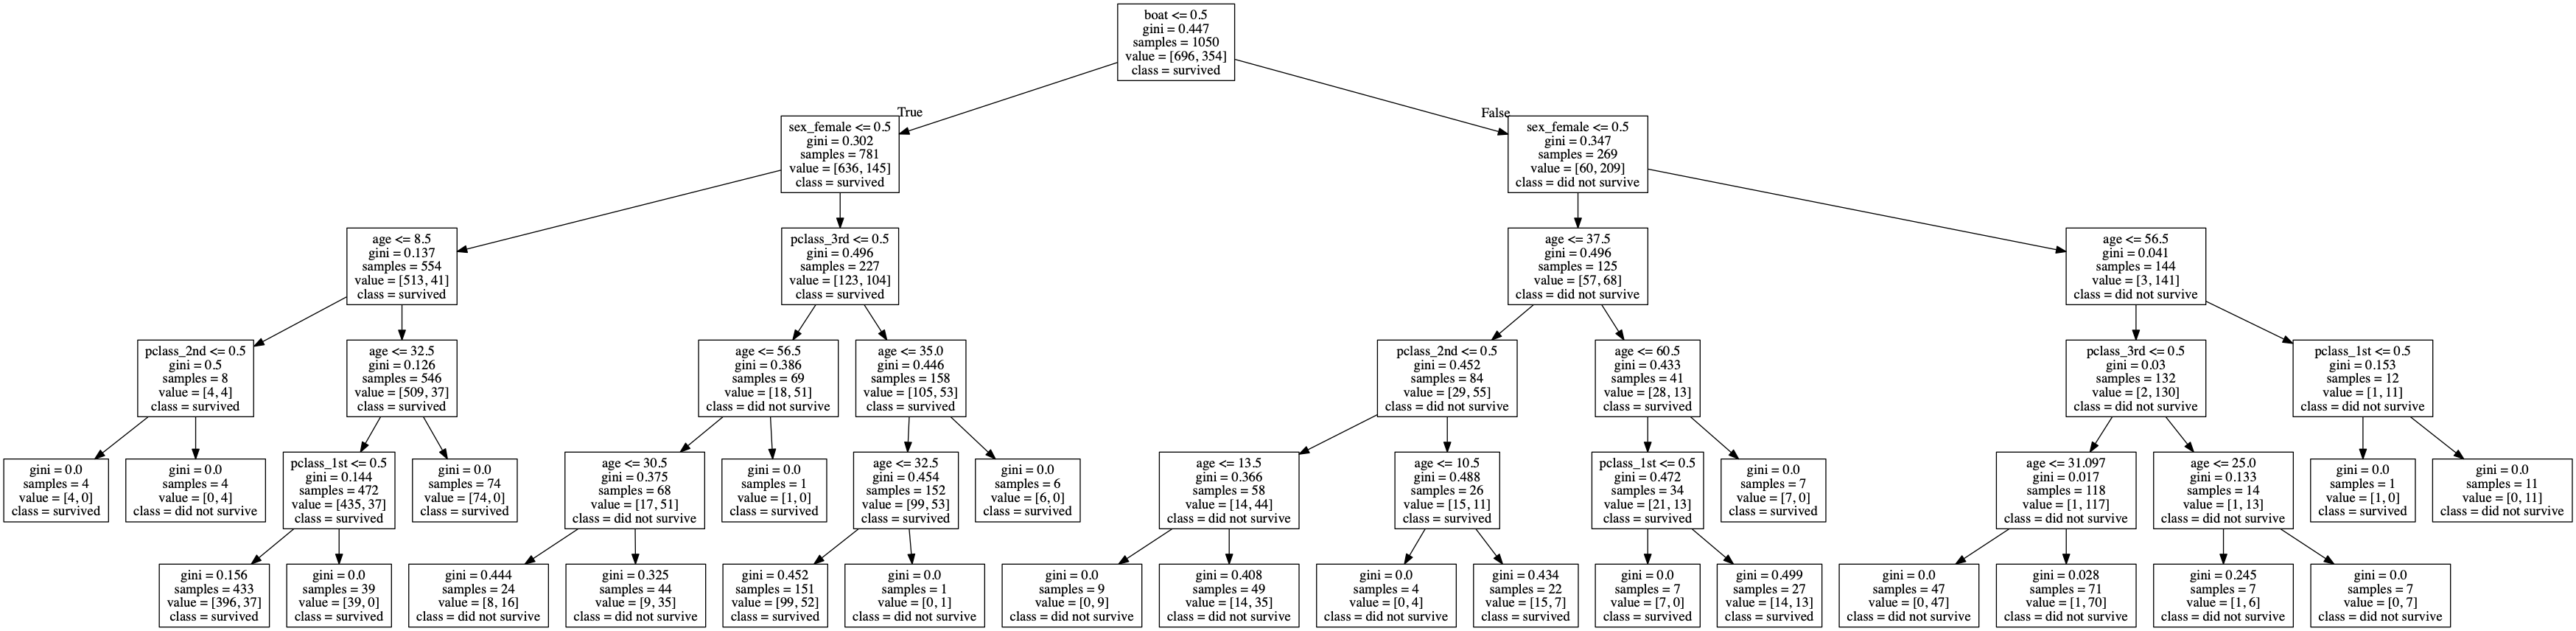

In [14]:
from sklearn.externals.six import StringIO  
import pydotplus


dot_data = StringIO() 
tree.export_graphviz(decision_tree, out_file=dot_data, 
                     feature_names=X_train.columns.values, class_names=['survived', 'did not survive']) 
from IPython.core.display import Image 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


## Clasificador Bayesiano para el corpus del titanic.
Naïve Bayes acepta atributos categóricos, por lo que no es necesario realizar One-Hot Encoding.
Sí es necesario convertir a atributos numéricos.

,age,boat,pclass_1st,pclass_2nd,pclass_3rd,sex_female,sex_male
140,16.000000,1,1,0,0,1,0
903,31.194181,0,0,0,1,0,1
363,44.000000,0,0,1,0,1,0
199,31.194181,0,1,0,0,0,1
994,31.194181,0,0,0,1,0,1
297,31.194181,1,1,0,0,1,0
879,31.194181,0,0,0,1,0,1
10,47.000000,1,1,0,0,0,1
147,35.000000,1,1,0,0,1,0
354,31.194181,0,0,1,0,0,1


Nuevamente pueden probar con los distintos tipos de aprendizaje bayesiano, y elegir el que crean mejor.

In [18]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

Una vez que eligen el más apropiado para el problema, se guarda para evaluar contra el árbol de decisión.

In [19]:
naive_bayes = clf.fit(X_train, y_train)

## Evaluación
Para simplificar la evaluación, pueden crear una función que muestre los resultados al correrse con un conjunto de datos.  
Esto se puede reusar en futuras clases.

In [ ]:
from sklearn import metrics
def measure_performance(X,y,clf, ...):
    y_pred = clf.predict(y)
    metrics.f1_score()

## El dataset de los atletas
Ahora vamos a aplicar lo aprendido para un dataset, esta vez depende de ustedes tomar las decisiones que quieran tomar.

La idea es clasificar un corpus de atletas, tratando de predecir las medallas obtenidas en las olimpíadas.

In [ ]:
athletes = pd.read_csv('athlete_events_train.csv')